In [ ]:
import numpy as np
import qutip as qt
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from tqdm import tqdm
from pulses_lib import multi_bit_rotation as pulse, generate_single_spin_state as bloch, make_operator_lists as oplists, printLists



sns.set_style("whitegrid")

si = qt.qeye(2)
sx = qt.sigmax()
sy = qt.sigmay()
sz = qt.sigmaz()

Preverimo, če lahko v verigi iz $s_x$ in $s_y$ določimo $s_z$.


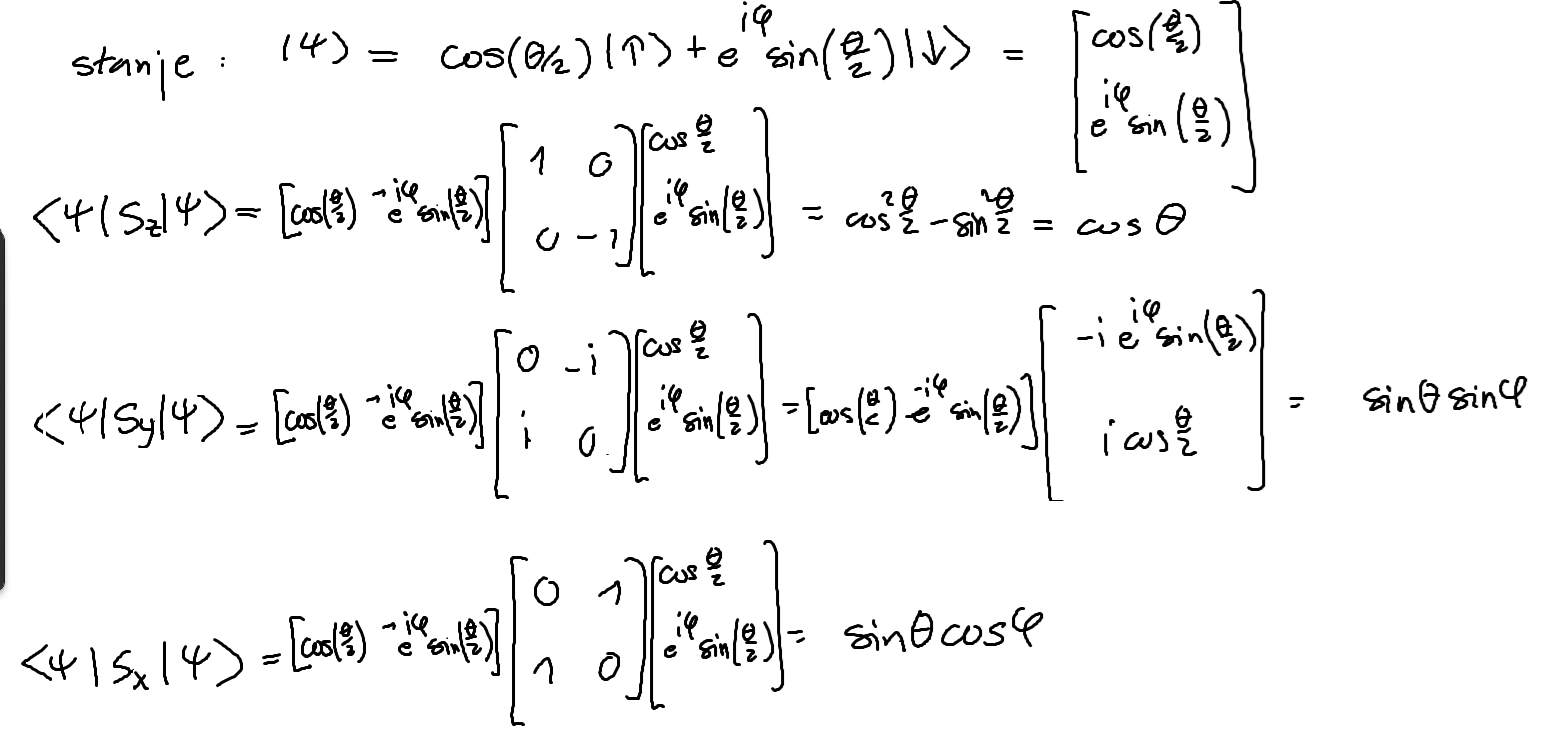

In [8]:
phi = np.pi/3
theta = 2*np.pi/6
chain = qt.tensor([bloch(phi, theta)])
rho0 = chain * chain.dag()

x = qt.expect(sx,rho0)
y = qt.expect(sy,rho0)
z = qt.expect(sz,rho0)

print(f"z: {z},  {np.cos(theta/2)**2-np.sin(theta/2)**2}")
print(f"y: {y},  {np.sin(theta)*np.sin(phi)}")
print(f"x: {x},  {np.sin(theta)*np.cos(phi)}")

z: 0.5000000000000002,  0.5000000000000002
y: 0.7499999999999999,  0.7499999999999999
x: 0.43301270189221935,  0.4330127018922194


Iz $s_z$ in $s_y$ lahko $s_x$ določimo kot

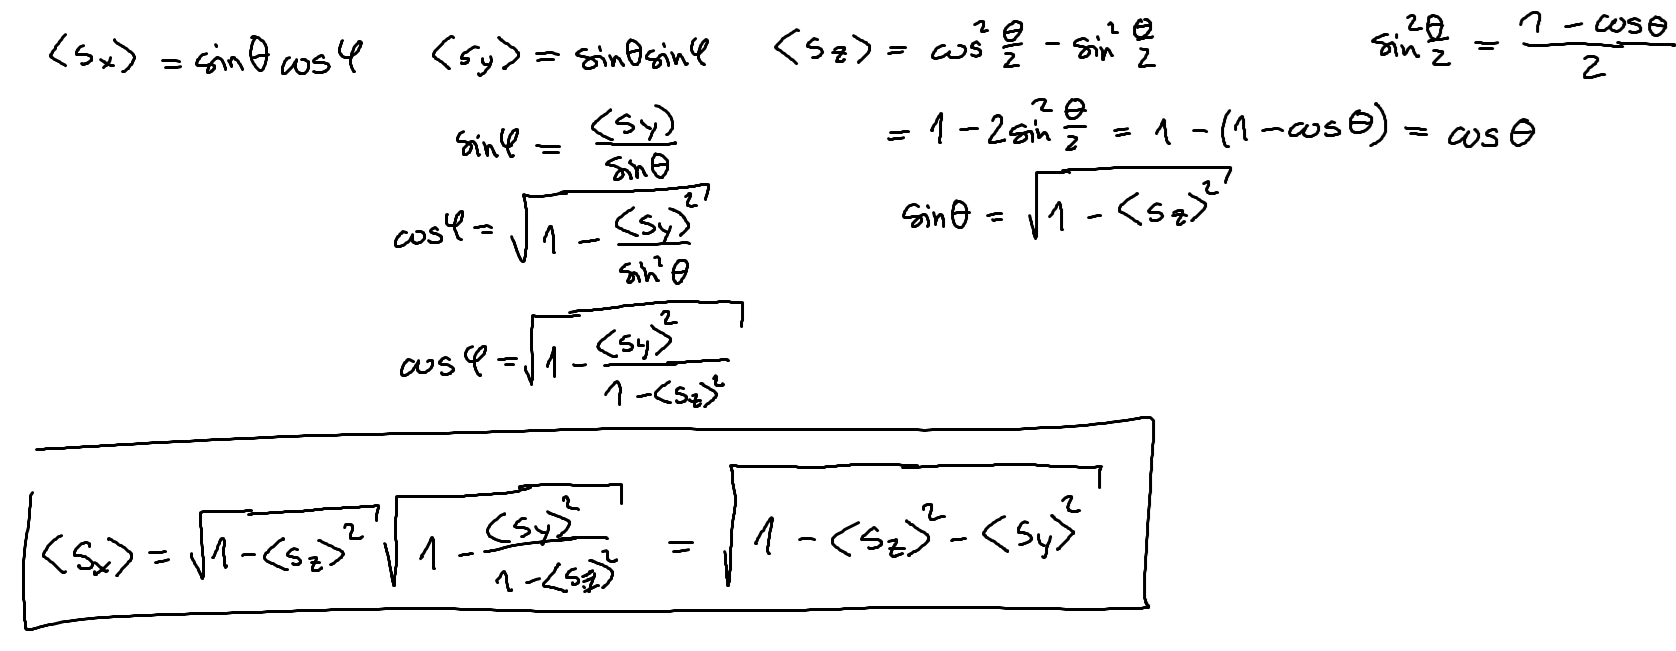

In [9]:
def x_from_yz(y,z):
    return np.sqrt(1-np.square(z)-np.square(y))

In [10]:
#Preverimo če to velja v verigi

N = 5
phi = [i for i in range(N)]
theta = [i for i in range(N)]
J = 100
hx = 0
hz = 0

sx_list, sy_list, sz_list = oplists(N)

chain = qt.tensor([bloch(phi[i], theta[i]) for i in range(N)])
rho = chain * chain.dag()

rho = pulse(N,J,hx,hz,rho,[["x", 0, [i for i in range(N)], 0]],0,1)

exactZ, exactY , exactX, predictedX = [], [], [], []
for i in range(N):
    exactX.append(qt.expect(sx_list[i], rho))
    exactY.append(qt.expect(sy_list[i], rho))
    exactZ.append(qt.expect(sz_list[i], rho))
    predictedX.append(x_from_yz(exactY[-1], exactZ[-1]))

printLists(["exactZ", "exactY", "exactX", "predictedX"], [exactZ, exactY, exactX, predictedX])
    



             exactZ     | exactY     | exactX     | predictedX | 
Spin 0:    |   0.998796 |   0.000000 |   0.000000 |   0.049053 | 
Spin 1:    |   0.539652 |   0.505279 |   0.076795 |   0.673401 | 
Spin 2:    |  -0.415646 |   0.605421 |  -0.086340 |   0.678752 | 
Spin 3:    |  -0.988801 |   0.064010 |   0.004702 |   0.134818 | 
Spin 4:    |  -0.652857 |   0.569799 |   0.487886 |   0.499106 | 


Direktna formula ne prepozna predznaka x

Če J ni enako 0 ne bo delovalo

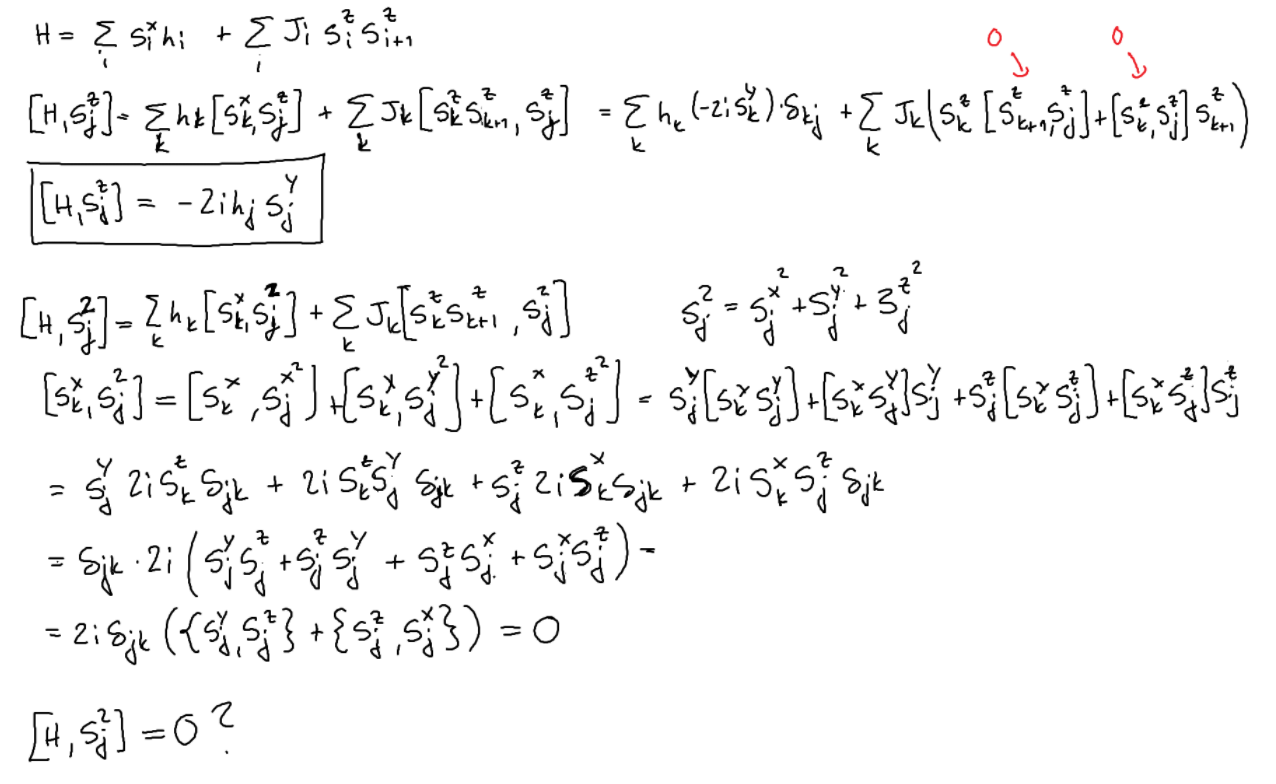

Gremo zdaj na dejansko rekonstrukcijo stanja!


In [12]:
N = 6
phis = [np.pi/2 for i in range(N)]
thetas = [np.pi/2 for i in range(N)]
startstate = qt.tensor([bloch(phis[i], thetas[i]) for i in range(N)])
startstate = startstate * startstate.dag()

##do operation or something
hx = 0
hz = 0
J = 1
endstate = pulse(N,J,hx,hz,startstate,[["x", 0, [i for i in range(N)], 0]],0,1)

##Do measurements
sx_list, sy_list, sz_list = oplists(N)
exactZ, exactY , exactX = [], [], []
for i in range(N):
    exactX.append(qt.expect(sx_list[i], endstate))
    exactY.append(qt.expect(sy_list[i], endstate))
    exactZ.append(qt.expect(sz_list[i], endstate))

##Reconstruct state
substates = []
for i in range(N):
    theta = np.arccos(exactZ[i])
    phi = np.arccos(exactX[i] / np.sqrt(1-exactZ[i]**2))
    
    substates.append(bloch(phi,theta))
newstate = qt.tensor(substates)
newstate = newstate * newstate.dag()

#print(endstate)
#print(newstate)

print(np.sqrt(np.real((endstate*newstate).tr())))
print(newstate.shape[0])




0.3301243483680496
64
